# Práctica: Intervalos de confianza y tamaño del efecto

>Este práctica es una adaptación del material desarrollado por el profesor Álex Dávila en el semestre 2019-1. 

Continuando tu trabajo en el Laboratorio de Psicología de la PUCP, se te ha pedido evaluar con mayor detalle el análisis que realizaste. Nuevamente, cargamos los datos recolectados:

In [8]:
# Cargamos los datos del experimento
import pandas as pd
exp = pd.read_csv('https://raw.githubusercontent.com/renatoparedes/EstadisticaYPsicologiaMatematica/main/RepasodeEstadistica/ExpA.csv')
exp.drop(columns=['Participante'],inplace=True)
exp.head()

,TrianguloBrillante,TrianguloOpaco,CuadradoBrillante,CuadradoOpaco,PentagonoBrillante,PentagonoOpaco
0,258,290,242,295,250,310
1,241,283,242,297,259,313
2,260,300,240,297,250,313
3,251,291,244,292,252,308
4,259,291,240,287,270,307


In [9]:
exp.describe()

,TrianguloBrillante,TrianguloOpaco,CuadradoBrillante,CuadradoOpaco,PentagonoBrillante,PentagonoOpaco
count,6.00000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,253.50000,291.000000,241.166667,294.000000,256.166667,310.666667
std,7.17635,5.403702,1.834848,3.898718,7.652886,2.732520
min,241.00000,283.000000,239.000000,287.000000,250.000000,307.000000
25%,251.25000,290.250000,240.000000,292.750000,250.500000,308.500000
50%,255.00000,291.000000,241.000000,295.500000,254.000000,311.500000
75%,258.75000,291.000000,242.000000,296.750000,258.250000,313.000000
max,260.00000,300.000000,244.000000,297.000000,270.000000,313.000000


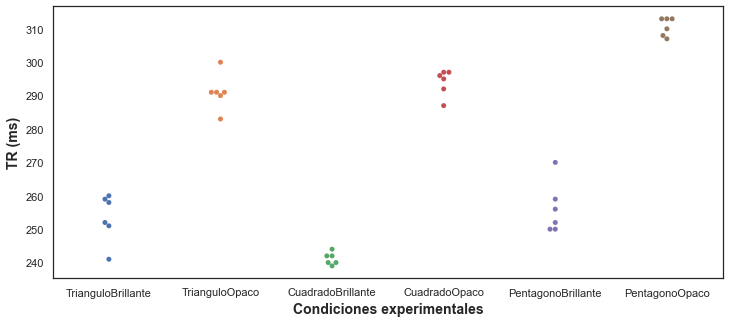

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={"figure.figsize":(12, 5)},style='white')
sns.swarmplot(data=exp);
plt.xlabel('Condiciones experimentales',size=14,fontweight='bold');
plt.ylabel('TR (ms)',size=14,fontweight='bold');

## Ejercicio 1
Compara gráficamente las condiciones `TrianguloBrillante` y `PentagonoBrillante` utilizando intervalos de confianza. 

> Sugerencia: Utiliza el método `.pointplot()` del paquete `seaborn`.

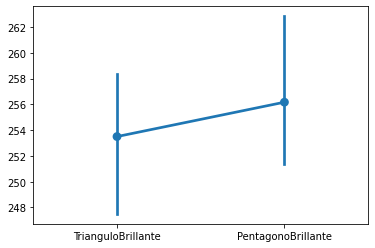

In [10]:
import seaborn as sns

# Escribe tu respuesta aquí
sns.pointplot(data=exp[['TrianguloBrillante','PentagonoBrillante']],ci=95);

¿Observas una potencial diferencia significativa? Confirma tu observación con una comparación de medias.

>Sugerencia: Utiliza la función `ttest_rel` disponible en el paquete `scipy.stats`.

In [11]:
from scipy import stats

# Escribe tu respuesta aquí
stats.ttest_rel(exp['TrianguloBrillante'],exp['PentagonoBrillante'])

Ttest_relResult(statistic=-0.6047431568147634, pvalue=0.5717418268656416)

¿Qué puedes concluir a partir de tus resultados?

De acuerdo a la prueba t de student de muestras relacionadas, no existiría una diferencia significativa entre las condiciones triángulo brillante y pentágono brillante.

## Ejercicio 2
Compara las condiciones `CuadradoBrillante` y `PentagoBrillante` utilizando una prueba t de student para muestras relacionadas. Además, reporta el tamaño del efecto con la métrica d de Cohen.

> Sugerencia: Utiliza la función `ttest` disponible en el paquete `researchpy`.

In [12]:
!pip install researchpy

In [18]:
import researchpy

# Escribe tu respuesta aquí
des,res=researchpy.ttest(exp['CuadradoBrillante'], exp['PentagonoBrillante'],paired=True)
des

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,CuadradoBrillante,6.0,241.166667,1.834848,0.749074,239.241112,243.092221
1,PentagonoBrillante,6.0,256.166667,7.652886,3.124278,248.135455,264.197878
2,diff,6.0,-15.000000,8.438009,3.444803,-23.855148,-6.144852


In [14]:
res

,Paired samples t-test,results
0,Difference (CuadradoBrillante - PentagonoBrill...,-15.0000
1,Degrees of freedom =,5.0000
2,t =,-4.3544
3,Two side test p value =,0.0073
4,Difference < 0 p value =,0.0037
5,Difference > 0 p value =,0.9963
6,Cohen's d =,-3.1620
7,Hedge's g =,-2.9187
8,Glass's delta =,-8.1751
9,Pearson's r =,0.8896


¿Qué puedes concluir a partir de tus resultados?

De acuerdo a la prueba t de student de muestras relacionadas, existiría una diferencia significativa entre las condiciones cuadrado brillante y pentágono brillante. Esto sugiere que los tiempos de reacción de los participantes son menores frente a un cuadrado brillante en comparación a un pentágono brillante. La magnitud del efecto encontrado califica como grande. 